# Project 7 -- Zeru Zhou

**TA Help:** NA


**Collaboration:** NA
    
- Get help from Dr.Ward's video

## Question 1

In [1]:
library(data.table)

In [2]:
books <- fread("/depot/datamine/data/goodreads/csv/goodreads_books.csv")

In [7]:
head(books)

isbn,author_id,text_reviews_count,country_code,language_code,asin,is_ebook,average_rating,kindle_asin,description,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<chr>,<chr>,...,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
0312853122,604031,1,US,,,FALSE,4.00,,,...,9,,1984,https://www.goodreads.com/book/show/5333265-w-c-fields,https://images.gr-assets.com/books/1310220028m/5333265.jpg,5333265,3,5400751,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film
0743509986,626222,6,US,,,FALSE,3.23,B000FC0PBC,"Anita Diamant's international bestseller """"The Red Tent"""" brilliantly re-created the ancient world of womanhood. Diamant brings her remarkable storytelling skills to """"Good Harbor"""" -- offering insight to the precarious balance of marriage and career, motherhood and friendship in the world of modern women. The seaside town of Gloucester, Massachusetts is a place where the smell of the ocean lingers in the air and the rocky coast glistens in the Atlantic sunshine. When longtime Gloucester-resident Kathleen Levine is diagnosed with breast cancer, her life is thrown into turmoil. Frightened and burdened by secrets, she meets Joyce Tabachnik -- a freelance writer with literary aspirations -- and a once-in-a-lifetime friendship is born. Joyce has just bought a small house in Gloucester, where she hopes to write as well as vacation with her family. Like Kathleen, Joyce is at a fragile place in her life. A mutual love for books, humor, and the beauty of the natural world brings the two women together. They share their personal histories, and help each other to confront scars left by old emotional wounds. With her own trademark wisdom and humor, Diamant considers the nature, strength, and necessity of adult female friendship. """"Good Harbor"""" examines the tragedy of loss, the insidious nature of family secrets, as well as the redemptive power of friendship.",...,10,Abridged,2001,https://www.goodreads.com/book/show/1333909.Good_Harbor,https://s.gr-assets.com/assets/nophoto/book/111x148-bcc042a9c91a29c1d680899eff700a03.png,1333909,10,1323437,Good Harbor,Good Harbor
,10333,7,US,eng,B00071IKUY,FALSE,4.03,,Omnibus book club edition containing the Ladies of Madrigyn and the Witches of Wenshar.,...,NA,Book Club Edition,1987,https://www.goodreads.com/book/show/7327624-the-unschooled-wizard,https://images.gr-assets.com/books/1304100136m/7327624.jpg,7327624,140,8948723,"The Unschooled Wizard (Sun Wolf and Starhawk, #1-2)","The Unschooled Wizard (Sun Wolf and Starhawk, #1-2)"
0743294297,9212,3282,US,eng,,FALSE,3.49,B002ENBLOK,"Addie Downs and Valerie Adler were eight when they first met and decided to be best friends forever. But, in the wake of tragedy and betrayal during their teenage years, everything changed. Val went on to fame and fortune. Addie stayed behind in their small Midwestern town. Destiny, however, had more in store for these two. And when, twenty-five years later, Val shows up at Addie's front door with blood on her coat and terror on her face, it is the beginning of a wild adventure for two women joined by love and history who find strength together that they could not find alone.",...,7,,2009,https://www.goodreads.com/book/show/6066819-best-friends-forever,https://s.gr-assets.com/assets/nophoto/book/111x148-bcc042a9c91a29c1d680899eff700a03.png,6066819,51184,6243154,Best Friends Forever,Best Friends Forever
0850308712,149918,5,US,,,FALSE,3.40,,,...,NA,,NA,https://www.goodreads.com/book/show/287140.Runic_Astrology,https://images.gr-assets.com/books/1413219371m/287140.jpg,287140,15,278577,Runic Astrology: Starcraft and Timekeeping in the Northern Tradition,Runic Astrology: Starcraft and Timekeeping in the Northern Tradition
1599150603,3041852,7,US,,,FALSE,4.13,B00DU10PUG,"Relates in vigorous prose the tale of Aeneas, the legendary ancestor of Romulus, who escaped from the burni

In [8]:
sort(tapply(books$average_rating, books$publication_month, mean, na.rm=T), decreasing=T)

11       10       12        9        7        3        6        8 
3.896019 3.894687 3.884090 3.877145 3.875555 3.874091 3.873604 3.871243 
       5        4        2        1       25 
3.868895 3.866506 3.863665 3.844618 0.000000

As a result, average rating is highest in November and lowest in January, according the table listed above. I suggest Dr. Ward publish his work in November because the rating (3.896) is relative higher than the other months across the whole year.

## Question 2

In [4]:
summary(books$num_pages)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
     0.0    147.0    245.0    264.3    344.0 945077.0   323929 

In [5]:
books$book_size_cat <- cut(books$num_pages, breaks= c(0, 100, 400, Inf), include.lowest=T, useNA="always", labels= c("small","medium","large"))

In [6]:
table(books$book_size_cat, useNA= "always")


 small medium  large   <NA> 
110311 466681  99079 323929 

In above, I use Dr.Ward's break period to justify my method is correct. Then I'm gonna use my break period.

In [4]:
books$book_size_cat <- cut(books$num_pages, breaks= c(0, 145, 345, Inf), include.lowest=T, useNA="always", labels= c("small","medium","large"))

In [9]:
table(books$book_size_cat,useNA="always")


 small medium  large   <NA> 
167855 340389 167827 323929 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
     0.0    147.0    245.0    264.3    344.0 945077.0   323929 

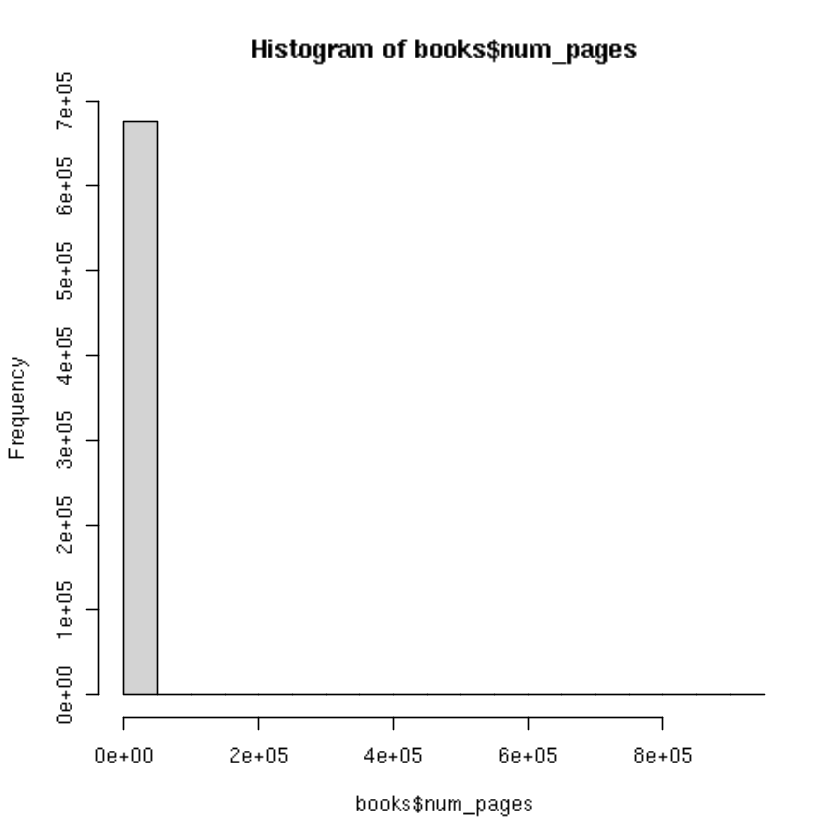

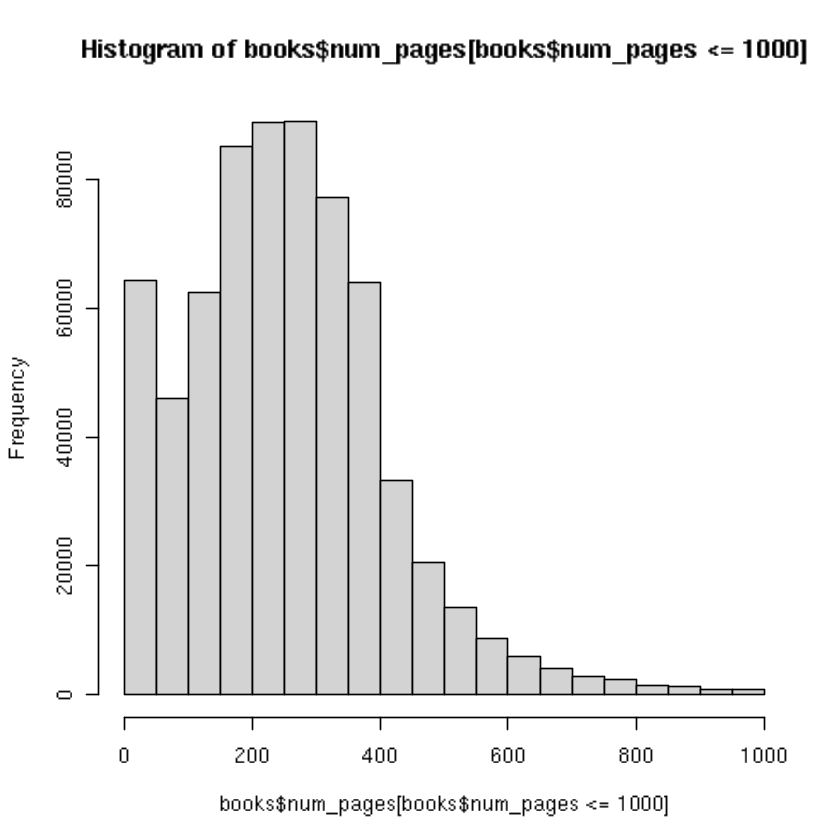

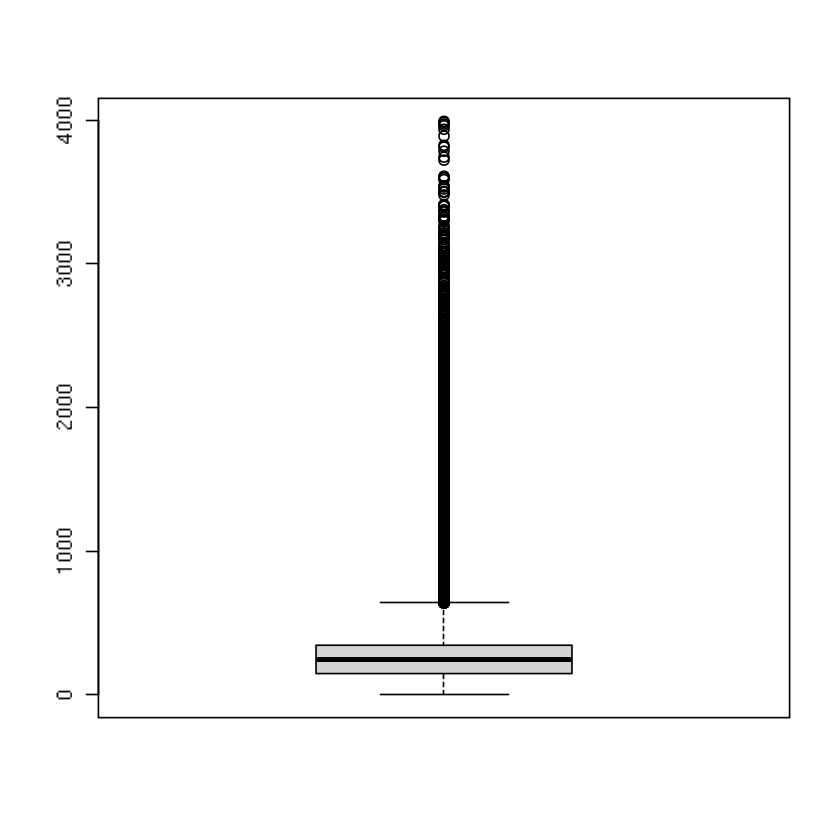

In [17]:
summary(books$num_pages)
hist(books$num_pages)
hist(books$num_pages[books$num_pages <= 1000])
boxplot(books$num_pages[books$num_pages < 4000])

I pick [0,145] as small since the first quarter is 147, so I just find a number 145 near it to define as "small". Then, I pick [145,345] as medium since the third quarter is 344, I find a number 345 near it to divide the boundry between medium and large. Then, if the number id greater than 345, it is defined as large because it is larger than 3/4 of the data. The result of running "table(books$book_size_cat)" is listed above.

## Question 3

In [10]:
tapply(books$text_reviews_count, books$book_size_cat, mean)

small   medium    large 
15.26532 34.11074 59.55379

As the table above, we see that text reviews are far more in category "large" than in "medium" or "small". Therefore, as a firm believer in feedback, Dr. Ward should consider about large size as book size, which is more than 345 pages in my division in last problem.

## Question 4

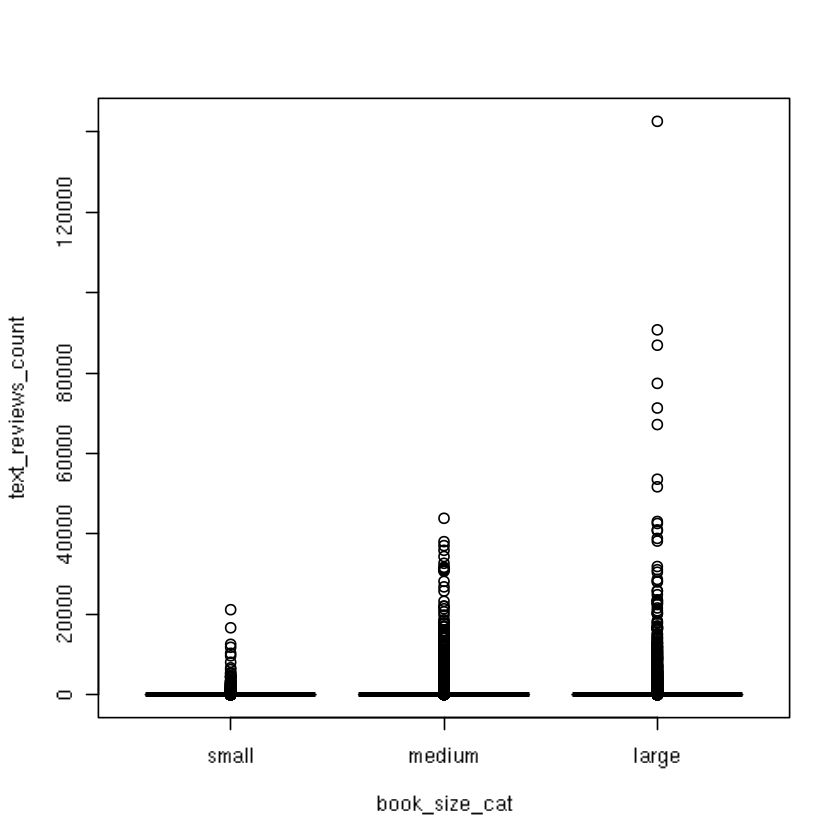

In [12]:
boxplot(text_reviews_count~book_size_cat, data= books)

My answer won't change based on the boxplot because "large" is still category that owns more reviews, and "small" has obviously less reviews than the other categorys. So, I would still recommand "large" book size. To be honest, the box is hard to read because the value beyond the box is so large that I can hardly see the box.

## Question 5

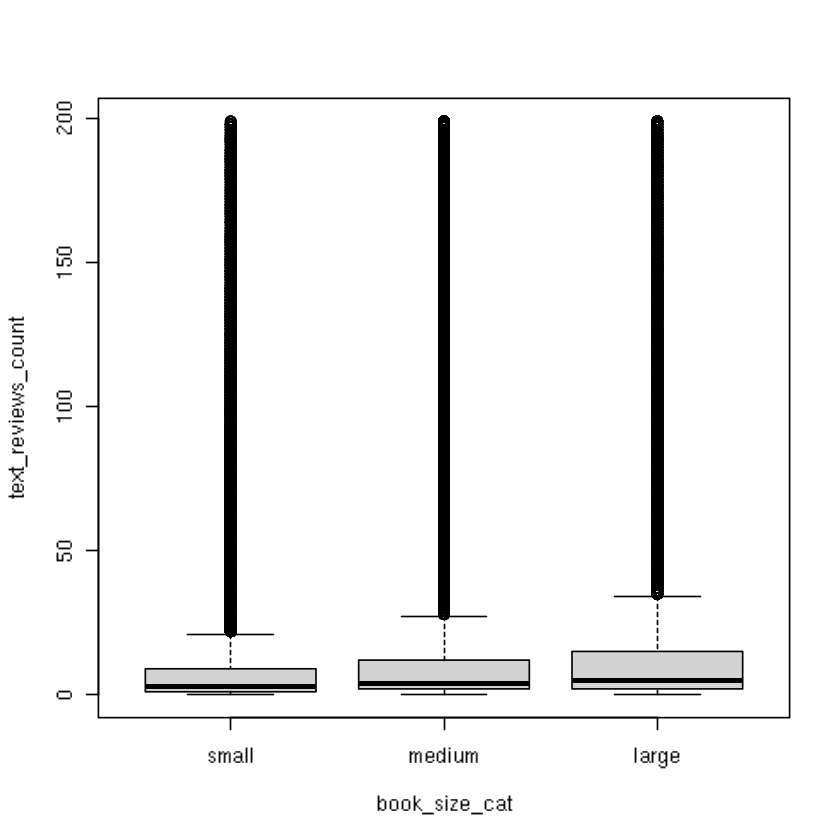

In [13]:
boxplot(text_reviews_count~book_size_cat, data= subset(books, text_reviews_count<200))

The box is shown up since we use a smaller data set to concentrate on smaller values. It is easier to read than before, and from the plot, we can see that large box has obviously larger number of reviews than medium and small.

## Question 6

In [3]:
authors <- fread("/depot/datamine/data/goodreads/csv/goodreads_book_authors.csv")

In [15]:
dim(authors)

[1] 829529      5

In [4]:
names(authors)

[1] "average_rating"     "author_id"          "text_reviews_count"
[4] "name"               "ratings_count"

In [5]:
names(authors) %in% names(books)

[1]  TRUE  TRUE  TRUE FALSE  TRUE

In [17]:
books_authors <- merge(books,authors, by.x="author_id", by.y="author_id")

In [18]:
dim(books_authors)

[1] 1000000      31

In [19]:
Sub <- subset(books_authors, name %in% c("Douglas Adams","Lloyd Alexander","William Shakespeare","John Donne","John Keats"))

In [20]:
dim(Sub)

[1] 1394   31

In [24]:
names(Sub)

[1] "author_id"            "isbn"                 "text_reviews_count.x"
 [4] "country_code"         "language_code"        "asin"                
 [7] "is_ebook"             "average_rating.x"     "kindle_asin"         
[10] "description"          "format"               "link"                
[13] "publisher"            "num_pages"            "publication_day"     
[16] "isbn13"               "publication_month"    "edition_information" 
[19] "publication_year"     "url"                  "image_url"           
[22] "book_id"              "ratings_count.x"      "work_id"             
[25] "title"                "title_without_series" "book_size_cat"       
[28] "average_rating.y"     "text_reviews_count.y" "name"                
[31] "ratings_count.y"

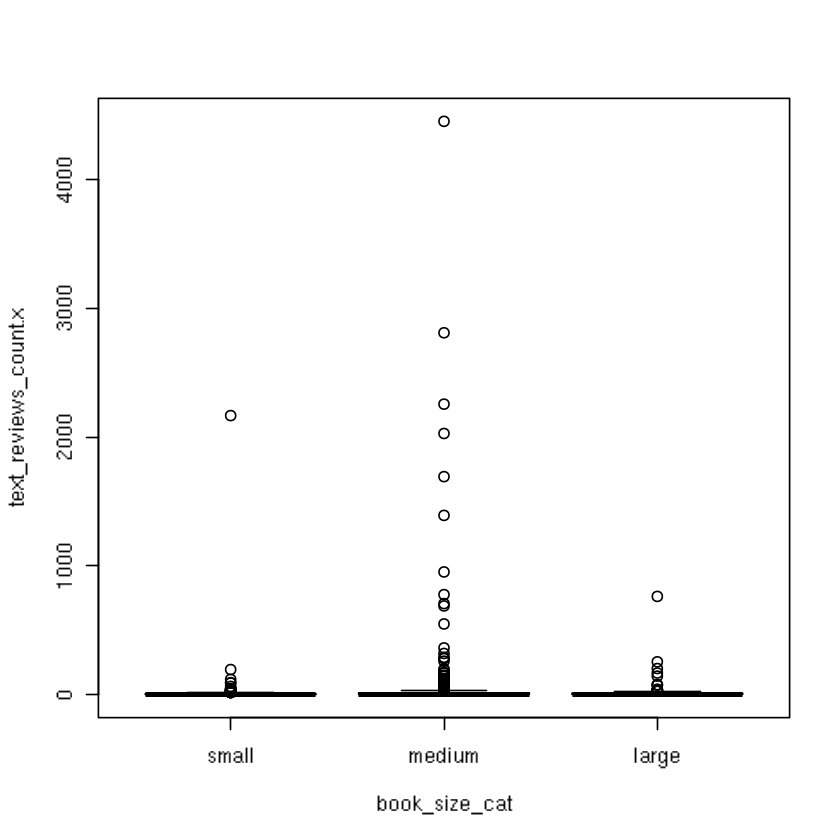

In [27]:
boxplot(text_reviews_count.x ~ book_size_cat, data= Sub)

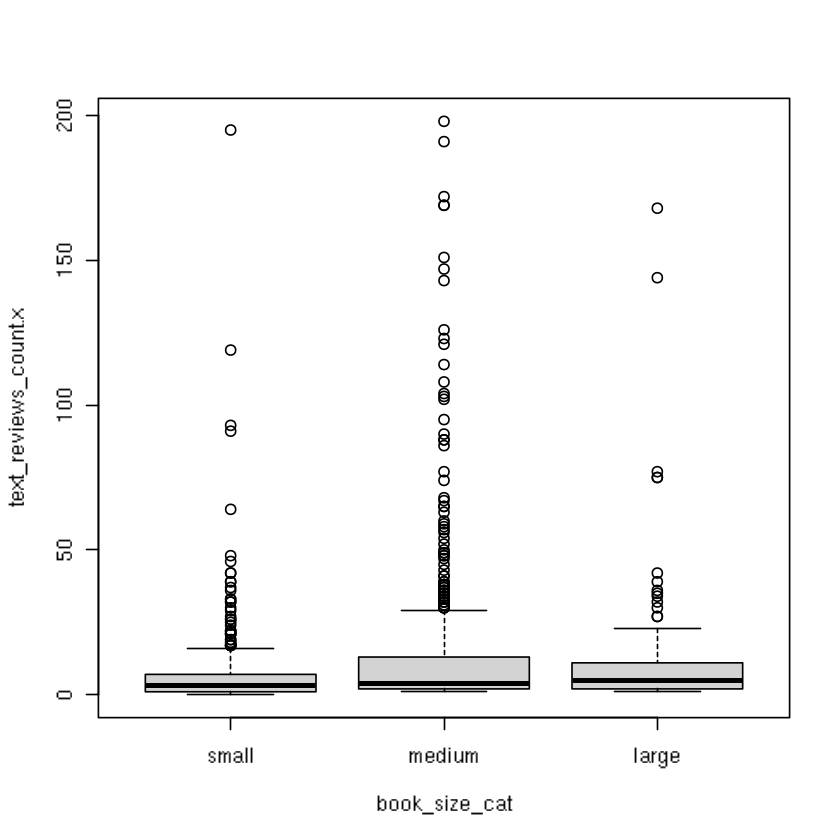

In [28]:
boxplot(text_reviews_count.x ~ book_size_cat, data= subset(Sub, text_reviews_count.x <200 ))

As we can see, recommandation should change to "medium" book size when we concentrate on these 5 authors: Douglas Adams, Lloyd Alexander, William Shakespeare, John Donne, and John Keats. In both original and restricted boxplot, "medium" book size seems to have greater number of reviews than "large" and "small". Thus, I would rather recommand "medium" book size here.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.